# Matplotlib Practice # 2

#### Figures and backends
- When looking at Matplotlib visualization, you are almost always looking at Artists placed on a Figure. In the example below, the figure is the blue region and add_subplot() has added an Axes artist to the Figure. A more complicated visualization can add multiple Axes to the Figure, colorbars, legends, annotations, and the Axes themsleves can have multiple Artists added to them (e.g. ax.plot or ax.imshow).

In [2]:
import matplotlib.pyplot as plt

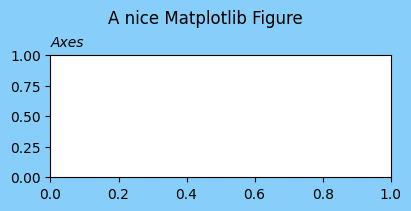

In [4]:
fig = plt.figure(figsize=(4, 2), facecolor="lightskyblue", layout="constrained")
fig.suptitle("A nice Matplotlib Figure")
ax = fig.add_subplot()
ax.set_title("Axes", loc="left", fontstyle="oblique", fontsize="medium")
plt.show()

#### Creating Figures
- By far the most common way to create a figure is using the pyplot interface. As noted in Matplotlib APIs, the pyplot interface serves two purposes. One is to spin up the Backend and keep track of GUI windows. The other is a global state for Axes and Artists that allow a short-form API to plotting methods. In the example above, we use pyplot for the first purpose, and create the Figure object, fig. as a side effect fig is also added to pyplot's global state, and can be accessed via gcf() function.
- Users typically want an Axes or a grid of Axes when they create a Figure, so in addition to figure, there are convenience methods that return both a Figure and some Axes. A simple grid of Axes can be achieved with pyplot.subplots() (which simply wraps Figure.subplots()):

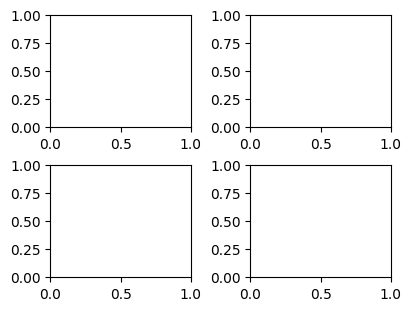

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(4, 3), layout="constrained")
plt.show()

- More complex grids can be achieved with pyplot.subplot_mosaic() function (which wraps Figure.subplot_mosaic())

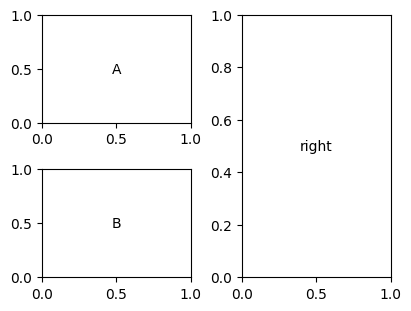

In [7]:
fig, axs = plt.subplot_mosaic([["A", "right"], ["B", "right"]], figsize=(4, 3), layout="constrained")
for ax_name, ax in axs.items():
    ax.text(0.5, 0.5, ax_name, ha="center", va="center")
plt.show()

- Sometimes we want to have a nested layout in a Figure, with two or more sets of Axes that do not share the same subplot grid. We can use add_subfigre() or subfigures() to create virtual figures inside a parent Figure.

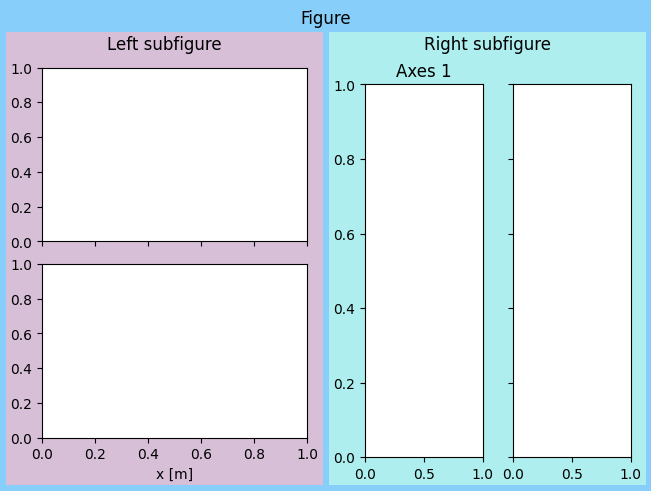

In [ ]:
fig = plt.figure(layout="constrained", facecolor="lightskyblue")
fig.suptitle("Figure")

figL, figR = fig.subfigures(1, 2) # create 2 figures
figL.set_facecolor("thistle") # set the left figure color

axL = figL.subplots(2, 1, sharex=True) # create 2 axes
axL[1].set_xlabel("x [m]") # set the title on the bottom ax for left figure
figL.suptitle("Left subfigure")

figR.set_facecolor("paleturquoise") # set color for right figure
axR = figR.subplots(1, 2, sharey=True) # craete 2 axes
axR[0].set_title("Axes 1") # set the title for the left ax
figR.suptitle("Right subfigure")

plt.show()

- It is possible to directly instantiate a Figure instance without using the pyplot interface. This is usually only necessary if you want to create your own GUI application or service that you do not want carrying the pyplot global state.

#### Figure Options
- There are a few options available when creating figures. The figure size on the screen is set by figsize and dpi. figsize is the (width, height) of the Figure in inches (or, if preferred, units of 72 typographic points). dpi are how many pixels per inch the figure will be rendered at. To make your Figures appear on the screen at the physical size you requested, you should set dpi to the same dpi as your graphics system. Note that many graphics systems now use a "dpi ratio" to specify how many screen pixels are used to represent a graphics pixel. Matplotlib applies the dpi ratio to the dpi passed to the figure to make it have higher resolution, so you should pass the lower number to the figure.
- The facecolor, edgecolor, linewidth, and frameon options all change the appearance of the figure in expected ways, with frameon making the figure transparent if set to False.
- Finally, the user can specify a layout engine for the figure with the layout parameter. Currently Matplotlib supplies "constrained", "compressed", and "tight" layout engines. These rescales axes inside the Figure to prevent overlap of ticklabels, and try and align axes, and can save significant manual adjustment of artists on a Figure for many common cases.

#### Adding Artists
- The Figure class has a number of methods for adding artists to a Figure or a SubFigure. By far the most common are to add Axes of various configurations (add_axes(), add_subplots(), subplots(_, subplot_mosaic)) and subfigures (subfigure()). Colorbars are added to Axes or group of Axes at the Figure level (colorbar). It is possible to have a Figure-level legend (legend()). Other Artists include figure-wide labels (suptitle(), supxlabel(), supylabel()) and text (text()). Finally, low-level Artists can be added directly using add_artist() usually with care being taken to use the appropriate transform. Usually these include Figure.transFigure() which ranges from 0 to 1 in each direction, and represents the fraction of the current Figure size, or Figure.dpi_scale_trans() which will be in physical units of inches from the bottomo left corner of the Figure.

#### Saving Figures
- Finally, Figures can be saved to disk using savefig() method. fig.savefig("MyFigure.png", dpi=200) will save a PNG formatted figure to the file MyFigure.png in the current directory on disk with 200 dot-per-inch resolution. Note that the filename can include a relative or absolute path to any place on the file system.
- Many types of output are supported, including raster formats like PNG, GIF, JPEG, TIFF and vector formats like PDF, EPS, and SVG.
- By default, the size of the saved Figure is set by the Figure size (in inches) and, for the raster formats, the dpi. If dpi is not set, then the dpi of the Figure is used. Note that dpi still has meaning for vector formats like PDF if the Figure includes Artists that have been rasterized; the dpi specified will be the resoluation of the rasterized objects.
- It is possible to change the size of the Figure using the bbox_inches argument to savefig. This can be specified manually, again in inches. However, by far the most common use is bbox_inches="tight". This option "shrink-wraps", trimming or expanding as needed, the size of the figure so that it is tight around all the artists in a figure, with a small pad that can be specified by pad_inches, which defaults to 0.1 inches. The dashed box in the plot below shows the portion of the figure that would be saved if bbox_inches="tight" were used in savefig.

### Backends
#### What is a backend?
- Backends are used for displaying Matplotlib figures, on the screen, or for writing to files. A lot of documentation on the website and in the mailing lists refers to the "backend" and many new users are confused by the term. Matplotlib targets many different use cases and output formats. Some people use Matplotlib interactively from the Python shell and have plotting windows pop up when they type commands. Some people run Jupyter noteboks and draw inline plots for quick data analysis. Others embed Matplotlib into graphical user interfaces like PyQt or PyGObject to build rich applications. Some people use Matplotlib in batch scripts to generate postscripts images from numerical simulations, and still others run web application servers to dynamically serve up graphs.
- To support all these use cases, Matplotlib can target different outputs, and each of these capabilities is called a backend; the "frontend" is the use facing code, i.e., the plotting code, whereas the "backend" does all the hard work behind-the-scenes to make the figure. These are two types of backends: user interface backends (for use in PyQt/PySide, Tkinter, wxPython, or MacOS/Cocoa); also referred to as "interactive backends" and hardcopy backends to make image files (PNG, SVG, PDF, PS; also referred to as "non-interactive backends").
#### Selecting a backend
- There are three ways to configure your backend:
    - The rcParams["backend"] parameter in your matplotlibrc file
    - The MPLBACKEND environment variable
    - The function matplotlib.use()
- If there is more than one configuration present, the last one from the list takes precedence; e.g. calling matplotlib.use() will override the setting in your matplotlibrc file.
- Without a backend explicitly set, Matplotlib automatically detects a usable backend based on what is available on your system and on whether a GUI event loop is already running. The first usable backend in the following list is selected: MacOSX, QtAgg, GTK4Agg, Gtk3Agg, TKAgg, WxAgg, Agg. The last, Agg, is a non-interactive backend that can only write to files. It is used on Linux, if Matplotlib cannot connect to either an X display or a Wayland display.
- Here is a detailed description of the configuration methods:
1. Setting rcParams["backend"] in your matplotlibrc file:
```
backend: qtagg # use pyqt with antigrain (agg) rendering
```
2. Setting the MPLBACKEND environment variable: you can set the environment variable either for your current shell or for a single script. 
- On Unix:
```
export MPLBACKEND=qtagg
python simple_plot.py

MPLBACKEND=qtagg ptyhon simple_plot.py
```
- Windows, only the former is possible:
```
set MPLBACKEND=qtagg
python simple_plot.py
```
Setting this environment variable will override the backend parameter in any matplotlibrc file, even if there is a matplotlibrc in your current working directory. Therefore, setting MPLBACKEND globaly, e.g. is your .bashrc or .profile, is discouraged as it might lead to counter-intuitive behavior.
3. If your script depends on a specific backend you can use the function matplotlib.use():
```python
import matplotlib
matplotlib.use("qtagg")
```
This should be done before any figure is created, otherwise Matplotlib may fail to switch the backend and raise an ImportError. Using use() will require changes in your code if users want to use a different backend. Therefore, you should avoid explicitly calling use() unless absolutely necessary.

#### The builtin backends
- By default, Matplotlib should automatically select a default backend which allows both interactive work and plotting from scripts, with output to the screen and/or to a file, so at least initially, you will not need to worry about the backend. The most common exception is if your Python distribution comes without tkinter and you have no other GUI toolkit installed. This happens with certain Linux distributions, where you need to install a Linux package named python-tk (or similar).
- If, however, you want to write graphical user interfaces, or a web application server (Embed in a web application server (Flask)), or need a better understanding of what is going on, read on. To make things easily more customizable for graphical user interfaces, Matplotlib separates the concept of the renderer (the thing that actually does the drawing) from the canvas (the place where the drawing goes). The canonical renderer for user interfaces is Agg which uses the Anti-Grain Geometry C++ library to make a raster (pixel) image of the figure; it is used by the QtAgg, GTK4Agg, GTK3Agg, wxAgg, TkAgg, and macosx backends. An alternative renderer is based on the Cairo library, used by QtCairo, etc.
- For the rendering engines, users can also distinguish between vector or raster renderers. Vector graphics languages issue drawing commands like "draw a line from this point to this point" and hence are scale free. Raster backends generate a pixel representation of the line whose accuracy depends on a DPI setting.
#### Static backends
- Here is a summary of the Matplotlib renderers (there is an eponymous backend for each; these are non-interactive backends, capable of writing to a file):

| Renderer   | Filetypes             | Description                                                                  |
| ---------- | -----------           | -----------                                                                  | 
| AGG        | png                   | raster graphics -- high quality images using the Anti-Grain Geometry engine. |
| PDF        | pdf                   | vector graphics -- Portable Document Format output. |
| PS         | ps, eps               | vector graphics -- PostScript output. |
| SVG        | svg                   | vector graphics -- Scalable Vector Graphics output. |
| PGF        | pgf, pdf              | vector graphics -- using the pgf package. |
| Cairo      | png, ps, pdf, svg     | raster or vector graphics -- using the Cairo library (requires pycairo or cairocffi). |

- To save plots using the non-interactive backends, use the matplotlib.pyplot.savefig("filename")

#### Interactive backends
- These are the user interfaces and renderer combinations supported; these are interactive backends, capable of displaying to the screen and using appropriate renderers from the table above to write to a file:

| Backend | Description |
| -------- | ---------- |
| QtAgg | Agg rendering in a Qt canvas (requires PyQt or Qt for Python, a.k.a. PySide). This backend can be activated in IPython with %matplotlib qt. The Qt binding can be selected via the QT_API environment variable; see Qt Bindings for more details. |
| ipympl | Agg rendering embedded in a Jupyter widget (requires ipympl). This backend can be enabled in a Jupyter notebook with %matplotlib ipympl or %matplotlib widget. Works with Jupyter lab and notebook>=7. |
| GTK3Agg | Agg rendering to a GTK 3.x canvas (requires PyGObject and pycairo). This backend can be activated in IPython with %matplotlib gtk3. |
| GTK4Agg | Agg rendering to a GTK 4.x canvas (requires PyGObject and pycairo). This backend can be activated in IPython with %matplotlib gtk4. |
| macosx | Agg rendering into a Cocoa canvas in macOS. This backend can be activated in IPython with %matplotlib osx. |
| TkAgg | Agg rendering to a Tk canvas (requires TkInter). This backend can be activated in IPython with %matplotlib tk. |
| nbAgg | Embed an interactive figure in a Jupyter classic notebook. This backend can be enabled in Jupyter notebooks via %matplotlib notebook or %matplotlib nbagg. Works with Jupyter notebook<7 and nbclassic. |
| WebAgg | On show() will start a tornado server with an interactive figure. |
| GTK3Cairo | Cairo rendering to a GTK 3.x canvas (requires PyGObject and pycairo). |
| GTK4Cairo | Cairo rendering to a GTK 4.x canvas (requires PyGObject and pycairo). |
| wxAgg | Agg rendering to a wxWidgets canvas (requires wxPython 4). This backend can be activated in IPython with %matplotlib wx. |

#### Debugging the figure windows not showing
- Sometimes things do not work as expected, usually during an install.
- If you are using a Notebook or integrated development environment (see Notebooks and IDEs), please consult their documentation for debugging figures not working in their environments.
- If you are using one of Matplotlib's graphics backends (see Standalone scripts and interactive use), make sure you know which one is being used:


In [13]:
import matplotlib

print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


### Matplotlib Application Interfaces (APIs)
- Matplotlib has two major application interfaces, or styles of using the library:
    - An explicit "Axes" interface that uses metods on a Figure or Axes object to create other Artists, and build a visualization step by step. This has also been called an "object-oriented" interface.
    - An implicit "pyplot" interface that keeps track of the last Figure and Axes crated, and adds Artists to the object it thinks the user wants.
- In addition, a number of downstream libraries (like pandas and xarray) offer a plot method implemented directly on their data clases so that users can call data.plot().
- The difference between these interfaces an be a bit confusing, particularly given snippets on the web that use one or the other, or sometimes multiple interfaces in the same example. Here we attempt to point out how the "pyplot" and downstream interfaces relate to the explicit "Axes" interface to help users better nagivate the library.

### Native Matplotlib interfaces
#### The explicit "Axes" interface
- The "Axes" interface is how Matplotlib is implemented, and many customizations and fine-tuning end up being done at this level.
- This interface works by instantiating an instance of a Figure class (fig below), using subplots() method (or similar) on that object to create one or more Axes objects (ax below), and then calling drawing methods on the Axes (plot in this example): 

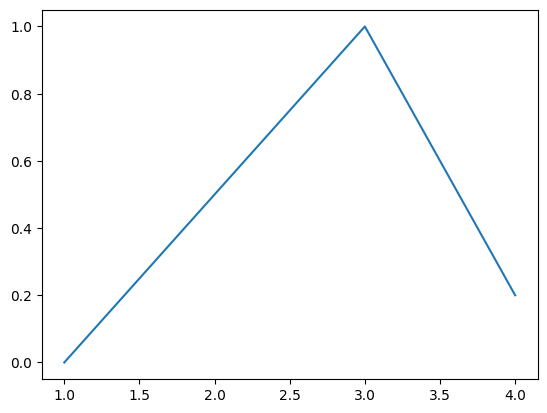

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()
ax.plot([1, 2, 3, 4], [0, 0.5, 1., 0.2])

plt.show()

- We call this an "explicit" interface because each object is explicitly referenced, and used to make the next object. Keeping references to the objects is very flexible, and allows us to customize the objects after they are created, but before they are displayed.

#### The implicit "pyplot" interface
- The pyplot module shadows most of the Axes plotting methods to give the equivalent of the above, where the creation of the Figure and Axes is done for the user:

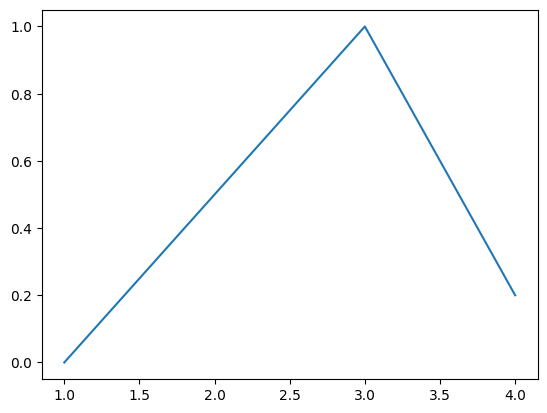

In [16]:
plt.plot([1, 2, 3, 4], [0, 0.5, 1., 0.2])
plt.show()

- This can be convenient, particularly when doing interactive work or simple scripts. A reference to the current Figure can be retrieved using gcf() and to the current Axes by gca(). The pyplot module retains a list of Figures, and each Figure retains a list of Axes on the figure for the user so that the following:

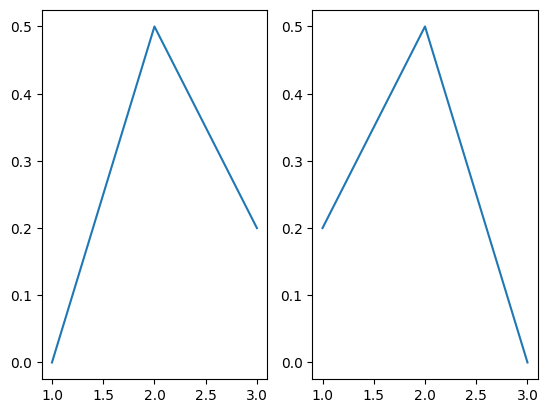

In [17]:
plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.show()

- is equivalent to:

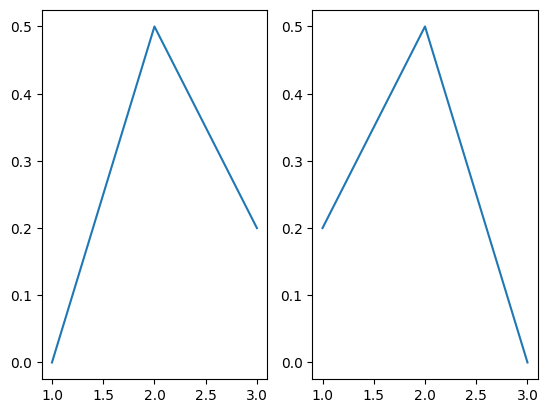

In [18]:
plt.subplot(1, 2, 1)
ax = plt.gca()
ax.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
ax = plt.gca()
ax.plot([3, 2, 1], [0, 0.5, 0.2])

plt.show()

- In the explicit interface, this would be:

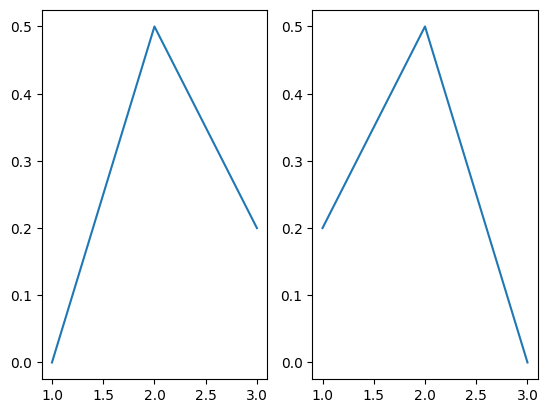

In [19]:
fig, axs = plt.subplots(1, 2)
axs[0].plot([1, 2, 3], [0, 0.5, 0.2])
axs[1].plot([3, 2, 1], [0, 0.5, 0.2])

plt.show()

#### Translating between the Axes interface and the pyplot interface
- You may find either interface in existing code, and unfortunately sometimes even mixtures. This section describes the patterns for specific operations in both interfaces and how to translate from one to the other.
    - Creating figures is the same for both interfaces: Use the respective pyplot functions plt.figure(), plt.subplots(), plt.subplot_mosaic(). For the Axes interface, you typically store the created Figure (and possibly Axes) in variables for later use. When using the pyplot interface, these values are typically not stored. Example:
        - Axes: fig, ax = plt.subplots()
        - pyplot: plt.subplots()
    - "Plotting" functions, i.e. functions that add data, are named the same and have identical parameters on the Axes and in pyplot. Example:
        - Axes: ax.plot(x, y)
        - pyplot: plt.plot(x, y)
    - Functions that retrieve properties are named like the property in pyplot and are prefixed with get_ on the Axes. Example:
        - Axes: label = ax.get_xlabel()
        - pyplot: label = plt.xlabel()
    - Functions that set properties like the property in pyplot and are prefixed with set_ on the Axes. Example:
        - Axes: ax.set_xlabel("time")
        - pyplot: plt.xlabel("time")

- Here is a short summary of the examples again as a side-by-side comparison:

| Operation             | Axes interface            | pyplot interface      |
| ------------          | ----------------------    | ---------------       |
| Creating figures      | fig, ax = plt.subplots()  | plt.subplots()        |
| Plotting data         | ax.plot(x, y)             | plt.plot(x, y)        |
| Getting properties    | label = ax.get_xlabel()   |  label = plt.xlabel() |
| Setting properties    | ax.set_xlabel("time")     | plt.xlabel("time")    |



#### Why be explicit?
- What happens if you have to backtrack, and operate on an old axes that is not referenced by plt.gca()? One simple way is to call subplot again with the same arguments. However, that quickly becomes inelegant. You can also inspect the Figure object and get its list of Axes objects, however, that can be misleading (colorbars are Axes too!). The best solution is probably to save a handle to every Axes you create, but if you do that, why not simply create the all the Axes objects at the start?

- The first approach is to call plt.subplot again:

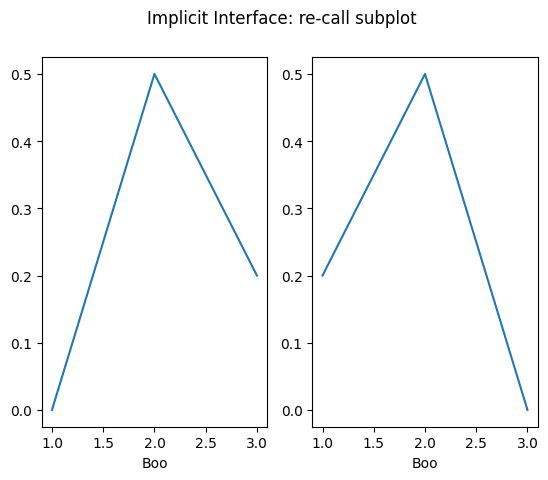

In [20]:
plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: re-call subplot')

for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.xlabel('Boo')

plt.show()

- The second is to save a handle:

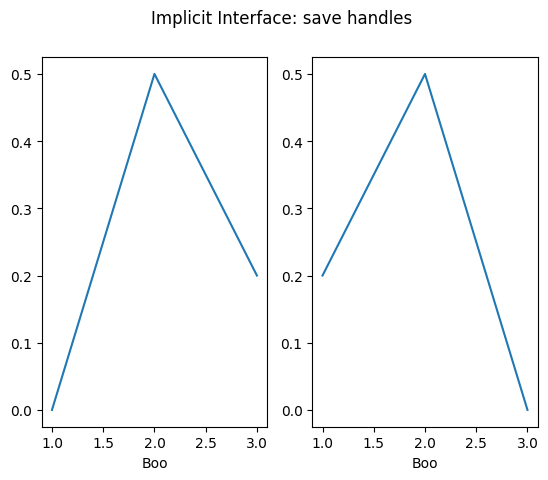

In [21]:
axs = []
ax = plt.subplot(1, 2, 1)
axs += [ax]
plt.plot([1, 2, 3], [0, 0.5, 0.2])

ax = plt.subplot(1, 2, 2)
axs += [ax]
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: save handles')

for i in range(2):
    plt.sca(axs[i])
    plt.xlabel('Boo')

plt.show()

- However, the recommended way would be to be explicit from the outset:

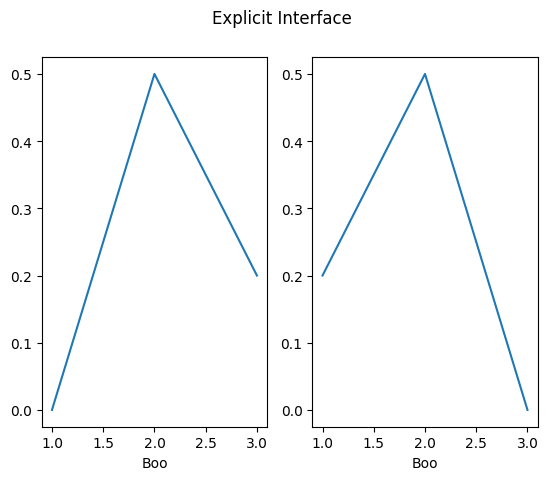

In [22]:
fig, axs = plt.subplots(1, 2)
axs[0].plot([1, 2, 3], [0, 0.5, 0.2])
axs[1].plot([3, 2, 1], [0, 0.5, 0.2])
fig.suptitle('Explicit Interface')
for i in range(2):
    axs[i].set_xlabel('Boo')

plt.show()

#### Third-party library "Data-object" interfaces
- Some third party libraries have chosen to implement plotting for their data objects, e.g. data.plot(), is seen in pandas, xarray, and other third-party libraries. For illustrative purposes, a downstream library may implement a simple data container that has x and y data stored together, and then implements a plot method:

<Axes: title={'center': 'Plotted from DataClass!'}>

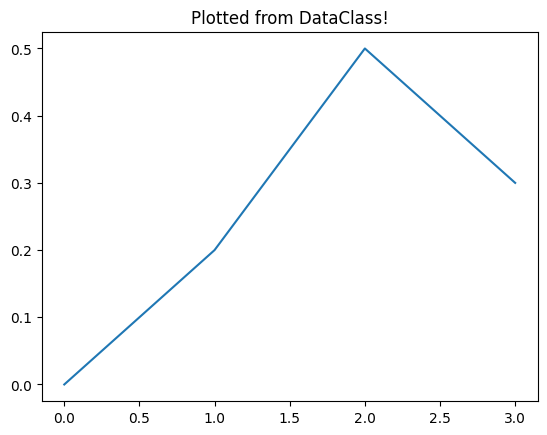

In [23]:
# supplied by downstream library:
class DataContainer:

    def __init__(self, x, y):
        """
        Proper docstring here!
        """
        self._x = x
        self._y = y

    def plot(self, ax=None, **kwargs):
        if ax is None:
            ax = plt.gca()
        ax.plot(self._x, self._y, **kwargs)
        ax.set_title('Plotted from DataClass!')
        return ax


# what the user usually calls:
data = DataContainer([0, 1, 2, 3], [0, 0.2, 0.5, 0.3])
data.plot()

- So the library can hide all the nitty-gritty from the user, and can make a visualization appropriate to the data type, often with good labels, choices of colormaps, and other convenient features.
- In the above, however, we may not have liked the title the library provided. Thankfully, they pass us back the Axes from the plot() method, and understanding the explicit Axes interface, we could call: ax.set_title('My preferred title') to customize the title.
- Many libraries also allow their plot methods to accept an optional ax argument. This allows us to place the visualization in an Axes that we have placed and perhaps customized.

#### Summary
- Overall, it is useful to understand the explicit "Axes" interface since it is the most flexible and underlies the other interfaces. A user can usually figure out how to drop down to the explicit interface and operate on the underlying objects. While the explicit interface can be a bit more verbose to setup, complicated plots will often end up simpler than trying to use the implicit "pyplot" interface.
- Note: It is sometimes confusing to people that we import pyplot for both interfaces. Currently, the pyplot module implements the "pyplot" interface, but it also provides top-level Figure and Axes creation methods, and ultimately spins up the graphical user interface, if one is being used. So pyplot is still needed regardless of the interface chosen.
- Similarly, the declarative interfaces provided by partner libraries use the objects accessible by the "Axes" interface, and often accept these as arguments or pass them back from methods. It is usually essential to use the explicit "Axes" interface to perform any customization of the default visualization, or to unpack the data into NumPy arrays and pass directly to Matplotlib.

### Interactive figures
- Interactivity can be invaluable when exploring plots. The pan/zoom and mouse-location tools built into the Matplotlib GUI windows are often sufficient, but you can also use the event system to build customized data exploration tools.
- Matplotlib ships with backends binding to several GUI toolkits (Qt, Tk, Wx, GTK, macOS, JavaScript) and third party packages provide bindings to kivy and Jupyter Lab. For the figures to be responsive to mouse, keyboard, and paint events, the GUI event loop needs to be integrated with an interactive prompt. We recommend using IPython (see below).
- The pyplot module provides functions for explicitly creating figures that include interactive tools, a toolbar, a tool-tip, and key bindings:

#### pyplot.figure()
    - Creates a new empty Figure or selects an existing figure
#### pyplot.subplots()
    - Creates a new Figure and fills it with a grid of Axes
#### pyplot.gcf()
    - Get the current Figure. If there is current no figure on the pyplot figure stack, a new figure is created
#### pyplot.gca()
    - Get the current Axes. IF there is current no Axes on the Figure, a new one created

- Almost all of the functions in pyplot pass through the current Figure / Axes  (or create one) as appropriate.
- Matplotlib keeps a reference to all of the open figures created via pyplot.figure or pyplot.subplots so that the figures will not be garbage collected. Figures can be closed and deregistered from pyplot individually via pyplot.close; all open Figures can be closed via plt.close('all').

#### IPython integration
- We recommend using IPython for an interactive shell. In addition to all of its features (improved tab-completion, magics, multiline editing, etc), it also ensures that the GUI toolkit event loop is properly integrated with the command line.
- In this example, we create and modify a figure via an IPython prompt. The figure displays in a QtAgg GUI window. To configure the integration and enable interactive mode use 

In [24]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


- Create a new figure window:

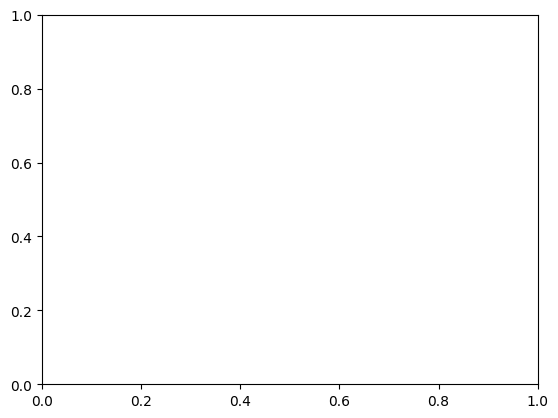

In [25]:
fig, ax = plt.subplots()

- Add a line plot of the data to the window:

In [26]:
ln, = ax.plot(range(5))

- Change the color of the line from blue to orange:

In [27]:
ln.set_color("orange")

- If you wish to disable automatic redrawing of the plot:

In [28]:
plt.ioff()

- If you wish to re-enable automatic redrawing of the plot:

In [29]:
plt.ion()

- In recent versions of Matplotlib and IPython, it is sufficient to import matplotlib.pyplot and call pyplot.ion. Using the % magic is guaranteed to work in all versions of Matplotlib and IPython.

#### Interactive mode


|       |                                      |
| --------------        | -----------------------                                        |
| pyplot.ion            | Enable interactive mode.                                       |
| pyplot.ioff           | Disable interactive mode.                                      |
| pyplot.isinteractive  | Return whether plots are updated after every plotting command. |
| pyplot.show           | Display all open figures.                                      |
| pyplot.pause          | Run the GUI event loop for interval seconds.                   |

#### Interactive mode controls:
- whether created figures are automatically shown
- whether changes to artists automatically trigger re-drawing existing figures
- when pyplot.show() returns if given no arguments: immediately, or after all of the figures have been closed

#### If in interactive mode:
- newly created figures will be displayed immediately
- figures will automatically redraw when elements are changed
- pyplot.show() displays the figures and immediately returns

#### If not in interactive mode:
- newly created figures and changes to figures are not displayed until
    - pyplot.show() is called
    - pyplot.pause() is called
    - FigureCanvasBase.flush_events() is called

- pyplot.show() runs the GUI event loop and does not return until all the plot windows are closed

- If you are in non-interactive mode (or created figures while in non-interactive mode) you may need to explicitly call pyplot.show to display the windows on your screen. If you only want to run the GUI event loop for a fixed amount of time, you can use pyplot.pause. This will block the progress of your code as if you had called time.sleep, ensure the current window is shown and re-drawn if needed, and run the GUI event loop for the specified period of time.

- The GUI event loop being integrated with your command prompt and the figures being in interactive mode are independent of each other. If you try to use pyplot.ion without arranging for the event-loop integration, your figures will appear but will not be interactive while the prompt is waiting for input. You will not be able to pan/zoom and the figure may not even render (the window might appear black, transparent, or as a snapshot of the desktop under it). Conversely, if you configure the event loop integration, displayed figures will be responsive while waiting for input at the prompt, regardless of pyplot's "interactive mode".

- No matter what combination of interactive mode setting and event loop integration, figures will be responsive if you use pyplot.show(block=True), pyplot.pause, or run the GUI main loop in some other way.

### Interactive figures and asynchronous programming
- Matplotlib supports rich interactive figures by embedding figures into a GUI window. The basic interactions of panning and zooming in an Axes to inspect your data is available out-of-the-box. This is supported by a full mouse and keyboard event handling system that you can use to build sophisticated interactive graphs.

- This guide is meant to be an introduction to the low-level details of how Matplotlib integration with a GUI event loop works. 

#### GUI events
- All GUI frameworks (Qt, Wx, Gtk, Tk, macOS, or web) have some method of capturing user interactions and passing them back to the application, but the exact details depend on the toolkit (for example callbacks in Tk or the Signal / Slot framework in Qt). The Matplotlib backends encapsulate the details of the GUI frameworks and provide a framework-independent interface to GUI events through Matplotlib's event handling system. By connecting functions to the event handling system (see FigureCanvasBase.mpl_connect), you can interactively respond to user actions in a GUI toolkit agnostic way.

#### Event loops
- Fundamentally, all user interaction (and networking) is implemented as an infinite loop waiting for events from the user (via the OS) and then doing something about it. For example, a minimal Read Evaluate Print Loop (REPL) is:
```python
exec_count = 0
while True:
    inp = input(f"[{exec_count}] > ")        # Read
    ret = eval(inp)                          # Evaluate
    print(ret)                               # Print
    exec_count += 1                          # Loop
```

- This is missing many niceties (for example, it exits on the first exception!), but is representative of the event loops that underlie all terminals, GUIs, and servers [1]. In general the Read step is waiting on some sort of I/O -- be it user input or the network -- while the Evaluate and Print are responsible for interpreting the input and then doing something about it.

- In practice we interact with a framework that provides a mechanism to register callbacks to be run in response to specific events rather than directly implement the I/O loop. For example "when the user clicks on this button, please run this function" or "when the user hits the 'z' key, please run this other function". This allows users to write reactive, event-driven, programs without having to delve into the nitty-gritty details of I/O. The core event loop is sometimes referred to as "the main loop" and is typically started, depending on the library, by methods with names like exec, run, or start.

#### Command prompt integration
- So far, so good. We have the REPL (like the IPython terminal) that lets us interactively send code to the interpreter and get results back. We also have the GUI toolkit that runs an event loop waiting for user input and lets us register functions to be run when that happens. However, if we want to do both we have a problem: the prompt and the GUI event loop are both infinite loops and cannot run in parallel. In order for both the prompt and the GUI windows to be responsive we need a method to allow the loops to "timeshare" :

- Blocking the prompt: let the GUI main loop block the python process when you want interactive windows
- Input hook integration: let the CLI main loop block the python process and intermittently run the GUI loop
- Full embedding: fully embed python in the GUI (but this is basically writing a full application)

#### Blocking the prompt

| | |
| ------------- | -------------- |
| pyplot.show                                       | Display all open figures.                     |
| pyplot.pause                                      | Run the GUI event loop for interval seconds.  |
| backend_bases.FigureCanvasBase.start_event_loop   | Start a blocking event loop.                  |
| backend_bases.FigureCanvasBase.stop_event_loop    | Stop the current blocking event loop.         |

- The simplest solution is to start the GUI event loop and let it run exclusively, which results in responsive figure windows. However, the CLI event loop will not run, so that you cannot enter new commands. We call this "blocking" mode. (Your terminal may echo the typed characters, but they will not yet be processed by the CLI event loop because the Python interpreter is busy running the GUI event loop).
- It is possible to stop the GUI event loop and return control to the CLI event loop. You can then use the prompt again, but any still open figure windows are non-responsive. Re-starting the GUI event loop will make these figure responsive again (and will process any queued up user interaction).
- The typical command to show all figures and run the GUI event loop exclusively until all figures are closed is:
```
plt.show()
```
- Alternatively, you can start the GUI event loop for a fixed amount of time using pyplot.pause.

- If you are not using pyplot you can start and stop the event loops via FigureCanvasBase.start_event_loop and FigureCanvasBase.stop_event_loop. However, in most contexts where you would not be using pyplot you are embedding Matplotlib in a large GUI application and the GUI event loop should already be running for the application.

- Away from the prompt, this technique can be very useful if you want to write a script that pauses for user interaction, or displays a figure between polling for additional data. See Scripts and functions for more details.

#### Input hook integration

- While running the GUI event loop in a blocking mode or explicitly handling UI events is useful, we can do better! We really want to be able to have a usable prompt and interactive figure windows.

- We can do this using the "input hook" feature of the interactive prompt. This hook is called by the prompt as it waits for the user to type (even for a fast typist the prompt is mostly waiting for the human to think and move their fingers). Although the details vary between prompts the logic is roughly

    - start to wait for keyboard input
    - start the GUI event loop
    - as soon as the user hits a key, exit the GUI event loop and handle the key
    - repeat

- This gives us the illusion of simultaneously having interactive GUI windows and an interactive prompt. Most of the time the GUI event loop is running, but as soon as the user starts typing the prompt takes over again.

- This time-share technique only allows the event loop to run while python is otherwise idle and waiting for user input. If you want the GUI to be responsive during long running code it is necessary to periodically flush the GUI event queue as described in Explicitly spinning the event loop. In this case it is your code, not the REPL, which is blocking the process so you need to handle the "time-share" manually. Conversely, a very slow figure draw will block the prompt until it finishes drawing.

#### Full embedding
- It is also possible to go the other direction and fully embed figures (and a Python interpreter) in a rich native application. Matplotlib provides classes for each toolkit which can be directly embedded in GUI applications (this is how the built-in windows are implemented!). 

#### Scripts and functions
| | |
| -------------------- | ---------------------- |
| backend_bases.FigureCanvasBase.flush_events | Flush the GUI events for the figure. |
| backend_bases.FigureCanvasBase.draw_idle | Request a widget redraw once control returns to the GUI event loop. |
| figure.Figure.ginput | Blocking call to interact with a figure. |
| pyplot.ginput | Blocking call to interact with a figure. |
| pyplot.show | Display all open figures. |
| pyplot.pause | Run the GUI event loop for interval seconds. |

- There are several use-cases for using interactive figures in scripts:
    - capture user input to steer the script
    - progress updates as a long running script progresses
    - streaming updates from a data source

#### Blocking functions

- If you only need to collect points in an Axes you can use Figure.ginput. However if you have written some custom event handling or are using widgets you will need to manually run the GUI event loop using the methods described above.

- You can also use the methods described in Blocking the prompt to suspend run the GUI event loop. Once the loop exits your code will resume. In general, any place you would use time.sleep you can use pyplot.pause instead with the added benefit of interactive figures.

- For example, if you want to poll for data you could use something like:
```python
fig, ax = plt.subplots()
ln, = ax.plot([], [])

while True:
    x, y = get_new_data()
    ln.set_data(x, y)
    plt.pause(1)
```
- which would poll for new data and update the figure at 1Hz.


#### Explicitly spinning the event loop

| | |
| ----------------------------- | ---------------------- |
| backend_bases.FigureCanvasBase.flush_events | Flush the GUI events for the figure. |
| backend_bases.FigureCanvasBase.draw_idle | Request a widget redraw once control returns to the GUI event loop.| 

- If you have open windows that have pending UI events (mouse clicks, button presses, or draws) you can explicitly process those events by calling FigureCanvasBase.flush_events. This will run the GUI event loop until all UI events currently waiting have been processed. The exact behavior is backend-dependent but typically events on all figure are processed and only events waiting to be processed (not those added during processing) will be handled.

- For example:

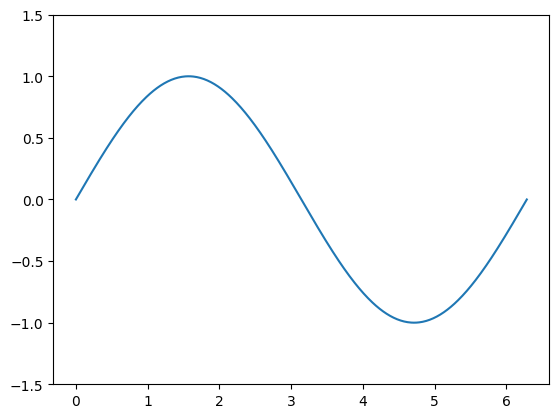

In [30]:
import time
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

fig, ax = plt.subplots()
th = np.linspace(0, 2*np.pi, 512)
ax.set_ylim(-1.5, 1.5)

ln, = ax.plot(th, np.sin(th))

def slow_loop(N, ln):
    for j in range(N):
        time.sleep(.1)  # to simulate some work
        ln.figure.canvas.flush_events()

slow_loop(100, ln)

- While this will feel a bit laggy (as we are only processing user input every 100ms whereas 20-30ms is what feels "responsive") it will respond.

- If you make changes to the plot and want it re-rendered you will need to call draw_idle to request that the canvas be re-drawn. This method can be thought of draw_soon in analogy to asyncio.loop.call_soon.

- We can add this to our example above as:
```python
def slow_loop(N, ln):
    for j in range(N):
        time.sleep(.1)  # to simulate some work
        if j % 10:
            ln.set_ydata(np.sin(((j // 10) % 5 * th)))
            ln.figure.canvas.draw_idle()

        ln.figure.canvas.flush_events()

slow_loop(100, ln)
```
- The more frequently you call FigureCanvasBase.flush_events the more responsive your figure will feel but at the cost of spending more resources on the visualization and less on your computation.

#### Stale artists
- Artists (as of Matplotlib 1.5) have a stale attribute which is True if the internal state of the artist has changed since the last time it was rendered. By default the stale state is propagated up to the Artists parents in the draw tree, e.g., if the color of a Line2D instance is changed, the Axes and Figure that contain it will also be marked as "stale". Thus, fig.stale will report if any artist in the figure has been modified and is out of sync with what is displayed on the screen. This is intended to be used to determine if draw_idle should be called to schedule a re-rendering of the figure.

- Each artist has a Artist.stale_callback attribute which holds a callback with the signature
```python
def callback(self: Artist, val: bool) -> None:
    ...
```

- which by default is set to a function that forwards the stale state to the artist's parent. If you wish to suppress a given artist from propagating set this attribute to None.

- Figure instances do not have a containing artist and their default callback is None. If you call pyplot.ion and are not in IPython we will install a callback to invoke draw_idle whenever the Figure becomes stale. In IPython we use the 'post_execute' hook to invoke draw_idle on any stale figures after having executed the user's input, but before returning the prompt to the user. If you are not using pyplot you can use the callback Figure.stale_callback attribute to be notified when a figure has become stale.

#### Idle draw
| | |
| ----------------- | ------------------- |
| backend_bases.FigureCanvasBase.draw           | Render the Figure.                                                    |
| backend_bases.FigureCanvasBase.draw_idle      | Request a widget redraw once control returns to the GUI event loop.   |
| backend_bases.FigureCanvasBase.flush_events   | Flush the GUI events for the figure.                                  |

- In almost all cases, we recommend using backend_bases.FigureCanvasBase.draw_idle over backend_bases.FigureCanvasBase.draw. draw forces a rendering of the figure whereas draw_idle schedules a rendering the next time the GUI window is going to re-paint the screen. This improves performance by only rendering pixels that will be shown on the screen. If you want to be sure that the screen is updated as soon as possible do

```python
fig.canvas.draw_idle()
fig.canvas.flush_events()
```

#### Threading
- Most GUI frameworks require that all updates to the screen, and hence their main event loop, run on the main thread. This makes pushing periodic updates of a plot to a background thread impossible. Although it seems backwards, it is typically easier to push your computations to a background thread and periodically update the figure on the main thread.

In general Matplotlib is not thread safe. If you are going to update Artist objects in one thread and draw from another you should make sure that you are locking in the critical sections.

### Event loop integration mechanism

#### CPython /readline
- The Python C API provides a hook, PyOS_InputHook, to register a function to be run ("The function will be called when Python's interpreter prompt is about to become idle and wait for user input from the terminal."). This hook can be used to integrate a second event loop (the GUI event loop) with the python input prompt loop. The hook functions typically exhaust all pending events on the GUI event queue, run the main loop for a short fixed amount of time, or run the event loop until a key is pressed on stdin.
- Matplotlib does not currently do any management of PyOS_InputHook due to the wide range of ways that Matplotlib is used. This management is left to downstream libraries -- either user code or the shell. Interactive figures, even with Matplotlib in "interactive mode", may not work in the vanilla python repl if an appropriate PyOS_InputHook is not registered.
- Input hooks, and helpers to install them, are usually included with the python bindings for GUI toolkits and may be registered on import. IPython also ships input hook functions for all of the GUI frameworks Matplotlib supports which can be installed via %matplotlib. This is the recommended method of integrating Matplotlib and a prompt.
